In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import  plot_decision_regions
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [6]:
dataset.drop(columns=['User ID', 'Gender'],inplace=True)

In [7]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x=dataset.iloc[:,:-1]
y=dataset['Purchased']

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

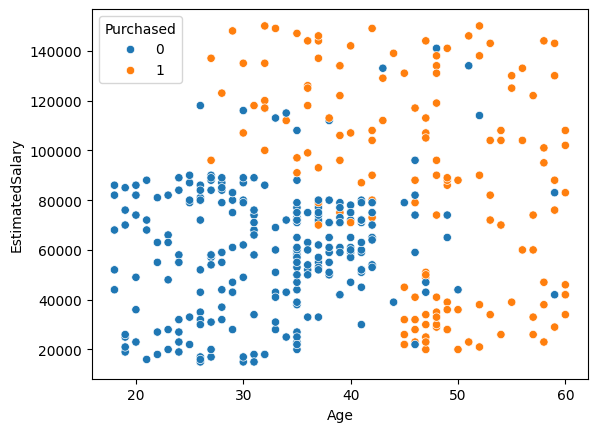

In [11]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=dataset)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
sc.fit(x)


StandardScaler()

In [16]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier(n_neighbors=4)

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
knn.score(x_test,y_test)

0.9

In [33]:
knn.score(x_train,y_train)

0.909375

In [35]:
for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i,p=1)
    knn1.fit(x_train,y_train)
    print('For n_neighbors=',i, knn1.score(x_train,y_train),knn1.score(x_test,y_test))

For n_neighbors= 1 0.996875 0.8875
For n_neighbors= 2 0.928125 0.8625


For n_neighbors= 3 0.921875 0.9125
For n_neighbors= 4 0.9125 0.9
For n_neighbors= 5 0.909375 0.9375
For n_neighbors= 6 0.90625 0.9375
For n_neighbors= 7 0.903125 0.9375
For n_neighbors= 8 0.9 0.9125
For n_neighbors= 9 0.903125 0.925
For n_neighbors= 10 0.903125 0.9125
For n_neighbors= 11 0.90625 0.9125
For n_neighbors= 12 0.9 0.9125
For n_neighbors= 13 0.90625 0.9125
For n_neighbors= 14 0.9 0.9125
For n_neighbors= 15 0.903125 0.9125
For n_neighbors= 16 0.903125 0.9125
For n_neighbors= 17 0.9 0.9125
For n_neighbors= 18 0.903125 0.9125
For n_neighbors= 19 0.9 0.9125
For n_neighbors= 20 0.9 0.9
For n_neighbors= 21 0.903125 0.925
For n_neighbors= 22 0.903125 0.9
For n_neighbors= 23 0.903125 0.9125
For n_neighbors= 24 0.90625 0.9
For n_neighbors= 25 0.90625 0.9
For n_neighbors= 26 0.903125 0.9
For n_neighbors= 27 0.903125 0.9
For n_neighbors= 28 0.909375 0.9
For n_neighbors= 29 0.903125 0.9


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


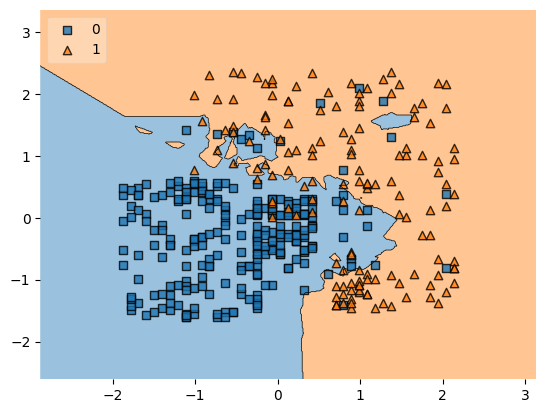

In [36]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn,legend=2)
plt.show()